# **Challenge Alura Store**

### **Autor:** David Olvera

---

### **Descripción del Proyecto**

Este proyecto es para realizar un análisis en 4 tiendas, para poder tomar la decisión de cerrar aquella que ofrezca menos utilidades, para reinvertir esas ganancias en otro negocio.

## Importación de datos



In [ ]:
import pandas as pd
from datetime import datetime
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

##1. Análisis de facturación



In [ ]:
tienda1.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359


In [ ]:
for df in [tienda1, tienda2, tienda3, tienda4]:
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='mixed', dayfirst=True, errors='coerce')
  df['Fecha de Compra'] = df['Fecha de Compra'].dt.strftime('%d/%m/%Y')

In [ ]:
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
def precio_final(df):
  df['Precio Final'] = df['Precio'] - df['Costo de envío']
  return df
for df in [tienda1,tienda2,tienda3,tienda4]:
  precio_final(df)

In [ ]:
facturacion = [df['Precio Final'].sum() for df in [tienda1,tienda2,tienda3,tienda4]]
df_facturacion = pd.DataFrame({'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], 'Facturación': facturacion})
df_facturacion.sort_values(by='Facturación', ascending=False)

,Tienda,Facturación
0,Tienda 1,1.089502e+09
1,Tienda 2,1.056858e+09
2,Tienda 3,1.039503e+09
3,Tienda 4,9.830583e+08


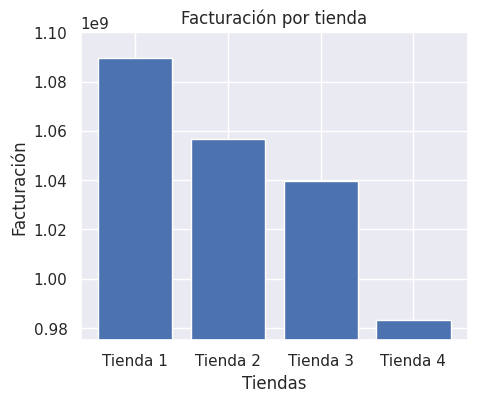

In [ ]:
# Diagrama de barras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(5,4)})
plt.bar(df_facturacion['Tienda'], df_facturacion['Facturación'])
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.title('Facturación por tienda')
plt.ylim(bottom=9.75*1e8,top= 1.1*1e9)
plt.show()

## 2. Ventas por categoría

### Tienda 1

In [ ]:
tienda1['Categoría del Producto'].value_counts()

,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


### Tienda 2

In [ ]:
tienda2['Categoría del Producto'].value_counts()

,count
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


### Tienda 3

In [ ]:
tienda3['Categoría del Producto'].value_counts()

,count
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177


### Tienda 4

In [ ]:
tienda4['Categoría del Producto'].value_counts()

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


##3. Calificación promedio de la tienda


In [ ]:
calif_tienda = [df['Calificación'].mean() for df in [tienda1,tienda2,tienda3,tienda4]]
df_calif = pd.DataFrame({'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], 'Calificación': calif_tienda})
df_calif.sort_values(by='Calificación', ascending=False)

,Tienda,Calificación
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


## 4. Productos más y menos vendidos

In [ ]:
def top_10_mas(df):
  return df.groupby('Producto').agg(Unidades=('Producto', 'count'), Total_Ventas=('Precio Final', 'sum')).sort_values('Unidades', ascending=False).head(10)
def top_10_menos(df):
  return df.groupby('Producto').agg(Unidades=('Producto', 'count'), Total_Ventas=('Precio Final', 'sum')).sort_values('Unidades', ascending=True).head(10)

### Top 10 más vendidos

#### Tienda 1

In [ ]:
top_10_mas(tienda1)

,Unidades,Total_Ventas
Producto,,
Armario,60,27898200.0
TV LED UHD 4K,60,134559300.0
Microondas,60,32942900.0
Secadora de ropa,58,55908300.0
Mesa de noche,56,14850300.0
Bloques de construcción,56,1773600.0
Balón de baloncesto,55,2609000.0
Bicicleta,54,25995900.0
Impresora,54,15541500.0


#### Tienda 2

In [ ]:
top_10_mas(tienda2)

,Unidades,Total_Ventas
Producto,,
Iniciando en programación,65,2965300.0
Microondas,62,34265900.0
Batería,61,43710600.0
Pandereta,58,3548300.0
Guitarra acústica,58,17654800.0
Secadora de ropa,57,55977900.0
Iphone 15,55,107195700.0
Bloques de construcción,54,1690000.0
Armario,54,24775600.0


#### Tienda 3

In [ ]:
top_10_mas(tienda3)

,Unidades,Total_Ventas
Producto,,
Kit de bancas,57,15800100.0
Mesa de comedor,56,13574200.0
Cama king,56,36732600.0
Set de ollas,55,8223200.0
Mesa de noche,55,14555200.0
Smart TV,54,74668900.0
Modelado predictivo,53,3196600.0
Cuerda para saltar,53,800100.0
Estufa,53,36522300.0


#### Tienda 4

In [ ]:
top_10_mas(tienda4)

,Unidades,Total_Ventas
Producto,,
Cama box,62,31194600.0
Cubertería,59,2506600.0
Cama king,56,35549200.0
Dashboards con Power BI,56,1856800.0
Carrito de control remoto,55,3792800.0
Mesa de noche,55,14312600.0
Mesa de comedor,55,12612900.0
Bloques de construcción,54,1823000.0
Smart TV,54,78382900.0


### Top 10 Menos vendidos

#### Tienda 1

In [ ]:
top_10_menos(tienda1)

,Unidades,Total_Ventas
Producto,,
Auriculares con micrófono,33,4459500.0
Celular ABXY,33,30903500.0
Olla de presión,35,2495600.0
Pandereta,36,2114500.0
Ciencia de datos con Python,39,1958100.0
Mochila,39,3682500.0
Dinosaurio Rex,40,619300.0
Asistente virtual,40,7633200.0
Muñeca bebé,40,1827800.0


#### Tienda 2

In [ ]:
top_10_menos(tienda2)

,Unidades,Total_Ventas
Producto,,
Juego de mesa,32,5505600.0
Impresora,34,9821800.0
Mesa de comedor,34,8164000.0
Sillón,35,7959700.0
Auriculares,37,3406300.0
Asistente virtual,38,7515800.0
Cubertería,39,1652900.0
Smart TV,40,57882000.0
Celular ABXY,41,39452100.0


#### Tienda 3

In [ ]:
top_10_menos(tienda3)

,Unidades,Total_Ventas
Producto,,
Bloques de construcción,35,1186100.0
Set de vasos,36,1138000.0
Mochila,36,3364900.0
Microondas,36,18144600.0
Vaso térmico,38,1625700.0
Guitarra eléctrica,38,28264100.0
Cubertería,39,1686300.0
Asistente virtual,39,7594500.0
Auriculares con micrófono,39,5651300.0


#### Tienda 4

In [ ]:
top_10_menos(tienda4)

,Unidades,Total_Ventas
Producto,,
Guitarra eléctrica,33,24471600.0
Armario,34,15550500.0
Guitarra acústica,37,10667200.0
Ciencia de datos con Python,38,1978300.0
Lavadora de ropa,38,49671100.0
Refrigerador,38,71283100.0
Ajedrez de madera,39,1011800.0
Celular ABXY,39,38032700.0
Smartwatch,39,6395200.0


## 5. Envío promedio por tienda

In [ ]:
costo_envio_prom = [round(df['Costo de envío'].mean(),2) for df in [tienda1,tienda2,tienda3,tienda4]]
df_costo_envio = pd.DataFrame({'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], 'Costo de envío Promedio': costo_envio_prom})
df_costo_envio.sort_values(by='Costo de envío Promedio', ascending=False)

,Tienda,Costo de envío Promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


Text(0.5, 1.0, 'Costo de envío promedio por tienda')

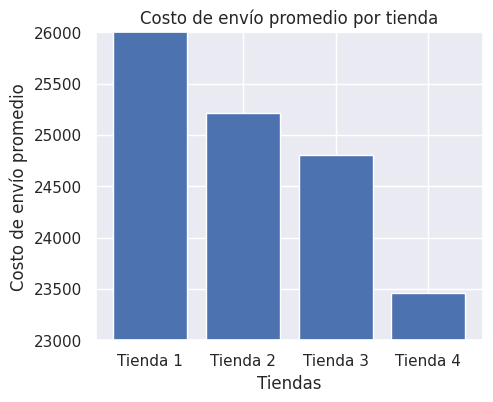

In [ ]:
# Diagrama de barras
plt.bar(df_costo_envio['Tienda'], df_costo_envio['Costo de envío Promedio'])
plt.xlabel('Tiendas')
plt.ylabel('Costo de envío promedio')
plt.ylim(bottom=23000,top=26000)
plt.title('Costo de envío promedio por tienda')

## Conclusión
Como podemos observar, la Tienda 4 es la tienda con menos utilidades, que, aunque es una tienda que tiene menor costo de envío promedio, no compensa en cuanto a la facturación. Más aún, la calificación de esta tienda es de 3.99, lo cual, está en el top 3 de las 4 mejores calificadas.

Por lo tanto, la mejor opción es vender la tienda 4.